In [55]:
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False 
# helps to ignore the warning

In [57]:
import numpy as np
import pandas as pd

In [58]:
!pip install text_hammer 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
import text_hammer as th

In [60]:
import seaborn as sns 

In [61]:
import matplotlib.pyplot as plt 
import re   
from wordcloud import STOPWORDS
from collections import defaultdict

In [62]:
from nltk.corpus import stopwords    # nltk corpus library is used to stop the word while preprocessing
from wordcloud import WordCloud      # importing wordcloud to represent the stop word

In [63]:
from google.colab import files
uploaded = files.upload()

Saving projdata.csv to projdata (1).csv


In [66]:
train_df=pd.read_csv("projdata (1).csv")

In [67]:
train_df.head(25)

,user_id,receiver_id,tweet_text,Sentiment,label
0,1848803329,5.156383e+09,rt @wckitchen: scenes from our food kit delive...,Positive,1
1,7923894274,1.365808e+09,"public health experts, juno thomas and linda e...",Negative,0
2,4849412096,8.631126e+09,rt @_bonga: kzn revised the cost of the floods...,Negative,0
3,1049078784,6.599854e+09,mdmema: even if you don’t live next to a water...,Negative,0
4,8201881600,7.952864e+09,rt @amydoghouse: @elonmusk @johnnacrider1 @sta...,Negative,0
5,3491522560,9.065958e+09,"rt @financeghost: tfg says a ""cloth"" warehouse...",Negative,0
6,7192453122,3.924692e+09,rt @gcis_kzn: they were also informed about go...,Negative,0
7,1883198468,4.143759e+09,rt @gcis_kzn: gcis together with durban and co...,Positive,1
8,9803795456,1.802742e+08,rt @gauravgogoiasm: drove a jcb near kaziranga...,Positive,1
9,2756045827,2.750225e+09,"beautiful home boasting large spacious rooms, ...",Positive,1


In [68]:
train_df = train_df.dropna()

In [69]:
train_df

,user_id,receiver_id,tweet_text,Sentiment,label
0,1848803329,5.156383e+09,rt @wckitchen: scenes from our food kit delive...,Positive,1
1,7923894274,1.365808e+09,"public health experts, juno thomas and linda e...",Negative,0
2,4849412096,8.631126e+09,rt @_bonga: kzn revised the cost of the floods...,Negative,0
3,1049078784,6.599854e+09,mdmema: even if you don’t live next to a water...,Negative,0
4,8201881600,7.952864e+09,rt @amydoghouse: @elonmusk @johnnacrider1 @sta...,Negative,0
...,...,...,...,...,...
484,8201881600,3.111840e+08,@cc_heart bro u a bitch 💀,Negative,0
487,22425620,2.242562e+07,@gmork99 @photoamy33 bitch,Negative,0
490,1883198468,2.242562e+07,teresa said that joe and melissa need to stand...,Negative,0
492,180274176,2.242562e+07,@el_pointe ain't that the truth. society is a ...,Negative,0


In [70]:
def text_preprocessing(df,col_name):   # defining the text preprocessing with column name
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())  # defining the specified columns with lower case
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))   # helps to remove the email id
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))   # helps to remove the htmal tags
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))  # helps to remove the special characters
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x)) # helps to remove the shortcut keywords
    return(df)

In [71]:
train_cleaned_data = text_preprocessing(train_df,'receiver_id')

  0%|          | 0/269 [00:00<?, ?it/s]

  0%|          | 0/269 [00:00<?, ?it/s]

  0%|          | 0/269 [00:00<?, ?it/s]

  0%|          | 0/269 [00:00<?, ?it/s]

  0%|          | 0/269 [00:00<?, ?it/s]

In [72]:
train_cleaned_data.head(25)

,user_id,receiver_id,tweet_text,Sentiment,label
0,1848803329,51563827200,rt @wckitchen: scenes from our food kit delive...,Positive,1
1,7923894274,13658081290,"public health experts, juno thomas and linda e...",Negative,0
2,4849412096,86311260170,rt @_bonga: kzn revised the cost of the floods...,Negative,0
3,1049078784,65998540800,mdmema: even if you don’t live next to a water...,Negative,0
4,8201881600,79528642560,rt @amydoghouse: @elonmusk @johnnacrider1 @sta...,Negative,0
5,3491522560,90659584010,"rt @financeghost: tfg says a ""cloth"" warehouse...",Negative,0
6,7192453122,39246919680,rt @gcis_kzn: they were also informed about go...,Negative,0
7,1883198468,41437593610,rt @gcis_kzn: gcis together with durban and co...,Positive,1
8,9803795456,1802741760,rt @gauravgogoiasm: drove a jcb near kaziranga...,Positive,1
9,2756045827,27502251110,"beautiful home boasting large spacious rooms, ...",Positive,1


In [73]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:

stop_words = set(stopwords.words('english'))
train_cleaned_data['receiver_id'] = train_cleaned_data['receiver_id'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words])) 

In [75]:
train_cleaned_data

,user_id,receiver_id,tweet_text,Sentiment,label
0,1848803329,51563827200,rt @wckitchen: scenes from our food kit delive...,Positive,1
1,7923894274,13658081290,"public health experts, juno thomas and linda e...",Negative,0
2,4849412096,86311260170,rt @_bonga: kzn revised the cost of the floods...,Negative,0
3,1049078784,65998540800,mdmema: even if you don’t live next to a water...,Negative,0
4,8201881600,79528642560,rt @amydoghouse: @elonmusk @johnnacrider1 @sta...,Negative,0
...,...,...,...,...,...
484,8201881600,3111839710,@cc_heart bro u a bitch 💀,Negative,0
487,22425620,224256200,@gmork99 @photoamy33 bitch,Negative,0
490,1883198468,224256200,teresa said that joe and melissa need to stand...,Negative,0
492,180274176,224256200,@el_pointe ain't that the truth. society is a ...,Negative,0


In [76]:
%matplotlib inline
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import sys
import os
from __future__ import division
plt.rcParams["figure.figsize"] = (20,10)
from itertools import chain
import tqdm as tqdm


In [77]:
pip install ColorThief

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
from colorthief import ColorThief

In [79]:
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [80]:
print(train_cleaned_data.shape)

(269, 5)


In [81]:
train_cleaned_data.head(5)

,user_id,receiver_id,tweet_text,Sentiment,label
0,1848803329,51563827200,rt @wckitchen: scenes from our food kit delive...,Positive,1
1,7923894274,13658081290,"public health experts, juno thomas and linda e...",Negative,0
2,4849412096,86311260170,rt @_bonga: kzn revised the cost of the floods...,Negative,0
3,1049078784,65998540800,mdmema: even if you don’t live next to a water...,Negative,0
4,8201881600,79528642560,rt @amydoghouse: @elonmusk @johnnacrider1 @sta...,Negative,0


In [82]:
train_df_melted = train_df.melt(['receiver_id','tweet_text', 'Sentiment','label'], var_name = 'cyberbullers',value_name='points')

In [83]:
train_df_melted.head(30)

,receiver_id,tweet_text,Sentiment,label,cyberbullers,points
0,51563827200,rt @wckitchen: scenes from our food kit delive...,Positive,1,user_id,1848803329
1,13658081290,"public health experts, juno thomas and linda e...",Negative,0,user_id,7923894274
2,86311260170,rt @_bonga: kzn revised the cost of the floods...,Negative,0,user_id,4849412096
3,65998540800,mdmema: even if you don’t live next to a water...,Negative,0,user_id,1049078784
4,79528642560,rt @amydoghouse: @elonmusk @johnnacrider1 @sta...,Negative,0,user_id,8201881600
5,90659584010,"rt @financeghost: tfg says a ""cloth"" warehouse...",Negative,0,user_id,3491522560
6,39246919680,rt @gcis_kzn: they were also informed about go...,Negative,0,user_id,7192453122
7,41437593610,rt @gcis_kzn: gcis together with durban and co...,Positive,1,user_id,1883198468
8,1802741760,rt @gauravgogoiasm: drove a jcb near kaziranga...,Positive,1,user_id,9803795456
9,27502251110,"beautiful home boasting large spacious rooms, ...",Positive,1,user_id,2756045827


In [84]:
train_df=train_df_melted

In [85]:
train_df.head(25)

,receiver_id,tweet_text,Sentiment,label,cyberbullers,points
0,51563827200,rt @wckitchen: scenes from our food kit delive...,Positive,1,user_id,1848803329
1,13658081290,"public health experts, juno thomas and linda e...",Negative,0,user_id,7923894274
2,86311260170,rt @_bonga: kzn revised the cost of the floods...,Negative,0,user_id,4849412096
3,65998540800,mdmema: even if you don’t live next to a water...,Negative,0,user_id,1049078784
4,79528642560,rt @amydoghouse: @elonmusk @johnnacrider1 @sta...,Negative,0,user_id,8201881600
5,90659584010,"rt @financeghost: tfg says a ""cloth"" warehouse...",Negative,0,user_id,3491522560
6,39246919680,rt @gcis_kzn: they were also informed about go...,Negative,0,user_id,7192453122
7,41437593610,rt @gcis_kzn: gcis together with durban and co...,Positive,1,user_id,1883198468
8,1802741760,rt @gauravgogoiasm: drove a jcb near kaziranga...,Positive,1,user_id,9803795456
9,27502251110,"beautiful home boasting large spacious rooms, ...",Positive,1,user_id,2756045827


In [86]:
train_df=train_df[train_df.label!=1]

In [87]:
train_df.head(25)

,receiver_id,tweet_text,Sentiment,label,cyberbullers,points
1,13658081290,"public health experts, juno thomas and linda e...",Negative,0,user_id,7923894274
2,86311260170,rt @_bonga: kzn revised the cost of the floods...,Negative,0,user_id,4849412096
3,65998540800,mdmema: even if you don’t live next to a water...,Negative,0,user_id,1049078784
4,79528642560,rt @amydoghouse: @elonmusk @johnnacrider1 @sta...,Negative,0,user_id,8201881600
5,90659584010,"rt @financeghost: tfg says a ""cloth"" warehouse...",Negative,0,user_id,3491522560
6,39246919680,rt @gcis_kzn: they were also informed about go...,Negative,0,user_id,7192453122
10,1098956870,rt @notsoaidil: kl is facing floods again. peo...,Negative,0,user_id,8146448385
12,64023029770,"rt @themarkjacka: hey young people, don’t stre...",Negative,0,user_id,2279404545
13,3177502750,rt @notsoaidil: kl is facing floods again. peo...,Negative,0,user_id,6819979265
16,81464483850,rt @notsoaidil: kl is facing floods again. peo...,Negative,0,user_id,3032926208


In [33]:
G = nx.from_pandas_edgelist(train_df, 
                            source='points',
                            target='receiver_id',
                            create_using=nx.DiGraph())

In [88]:
G2 = nx.from_pandas_edgelist(train_df, 
                            source='receiver_id',
                            target='points',
                            create_using=nx.DiGraph())

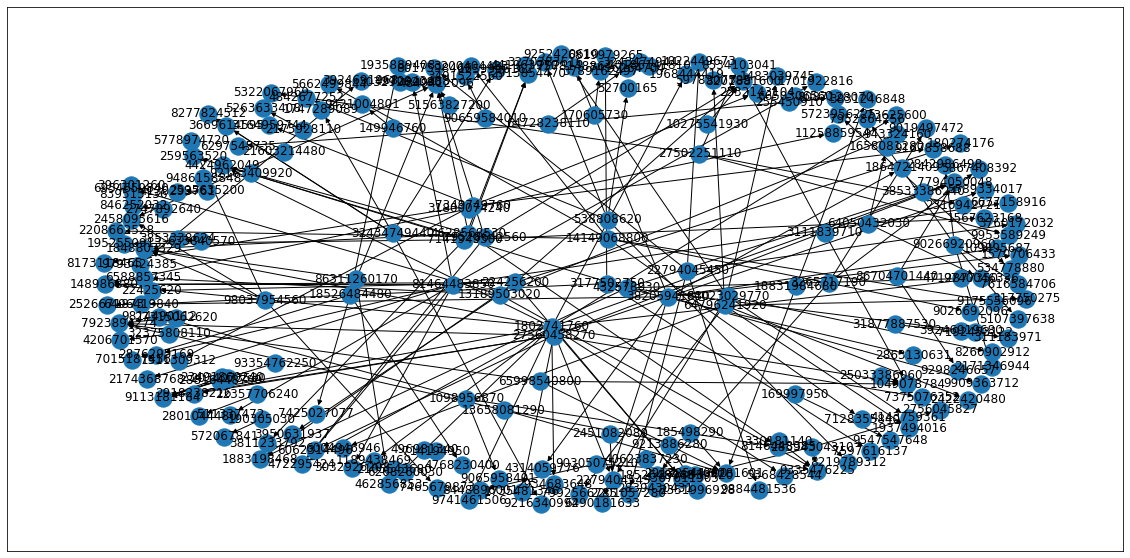

In [89]:
nx.draw_networkx(G2)

In [90]:
pr=nx.pagerank(G2)
print(pr)

{'13658081290': 0.0034975863410192562, 7923894274: 0.008825088917576893, '86311260170': 0.0034975863410192562, 4849412096: 0.010534845558425621, '65998540800': 0.0034975863410192562, 1049078784: 0.009123895491638265, '79528642560': 0.0034975863410192562, 8201881600: 0.009444565961362663, '90659584010': 0.0034975863410192562, 3491522560: 0.006471076151190959, '39246919680': 0.0034975863410192562, 7192453122: 0.007065774113225301, '1098956870': 0.0034975863410192562, 8146448385: 0.005083447573110831, '64023029770': 0.0034975863410192562, 2279404545: 0.007389359769038103, '3177502750': 0.0034975863410192562, 6819979265: 0.004240958793562182, '81464483850': 0.0034975863410192562, 3032926208: 0.003827974097705001, '7141949500': 0.0034975863410192562, 2913854470: 0.00766047207525964, '22794045450': 0.0034975863410192562, 9884481536: 0.004092284303053598, '1802741760': 0.0034975863410192562, 2934683648: 0.003672497506323474, '86704701440': 0.0034975863410192562, 7794050048: 0.0061256265997151

In [91]:
maxi=max(pr,key=pr.get)
print(maxi)

9113181184


In [47]:
mini=min(pr,key=pr.get)
print(mini)

13658081290
